SOMARA GEETHIKA

```
229x1a33426
```

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
from wordcloud import WordCloud
from google.colab import files

In [ ]:
uploaded = files.upload()


Saving swiggy.csv to swiggy.csv


In [ ]:
import pandas as pd

df = pd.read_csv("swiggy.csv", encoding='latin1')
df.head()


,id,name,city,rating,rating_count,cost,cuisine,lic_no,link,address,menu
0,567335,AB FOODS POINT,Abohar,--,Too Few Ratings,â¹ 200,"Beverages,Pizzas",22122652000138,https://www.swiggy.com/restaurants/ab-foods-po...,"AB FOODS POINT, NEAR RISHI NARANG DENTAL CLINI...",Menu/567335.json
1,531342,Janta Sweet House,Abohar,4.4,50+ ratings,â¹ 200,"Sweets,Bakery",12117201000112,https://www.swiggy.com/restaurants/janta-sweet...,"Janta Sweet House, Bazar No.9, Circullar Road,...",Menu/531342.json
2,158203,theka coffee desi,Abohar,3.8,100+ ratings,â¹ 100,Beverages,22121652000190,https://www.swiggy.com/restaurants/theka-coffe...,"theka coffee desi, sahtiya sadan road city",Menu/158203.json
3,187912,Singh Hut,Abohar,3.7,20+ ratings,â¹ 250,"Fast Food,Indian",22119652000167,https://www.swiggy.com/restaurants/singh-hut-n...,"Singh Hut, CIRCULAR ROAD NEAR NEHRU PARK ABOHAR",Menu/187912.json
4,543530,GRILL MASTERS,Abohar,--,Too Few Ratings,â¹ 250,"Italian-American,Fast Food",12122201000053,https://www.swiggy.com/restaurants/grill-maste...,"GRILL MASTERS, ADA Heights, Abohar - Hanumanga...",Menu/543530.json


In [ ]:
df.shape

(148541, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148541 entries, 0 to 148540
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            148541 non-null  int64 
 1   name          148455 non-null  object
 2   city          148541 non-null  object
 3   rating        148455 non-null  object
 4   rating_count  148455 non-null  object
 5   cost          148410 non-null  object
 6   cuisine       148442 non-null  object
 7   lic_no        148312 non-null  object
 8   link          148541 non-null  object
 9   address       148455 non-null  object
 10  menu          148541 non-null  object
dtypes: int64(1), object(10)
memory usage: 12.5+ MB


In [ ]:
df.describe()

,id
count,148541.000000
mean,363466.378912
std,167890.977174
min,211.000000
25%,233320.000000
50%,412628.000000
75%,502223.000000
max,581031.000000


In [ ]:
print(df.head())


       id               name    city rating     rating_count     cost  \
0  567335     AB FOODS POINT  Abohar     --  Too Few Ratings  â¹ 200   
1  531342  Janta Sweet House  Abohar    4.4      50+ ratings  â¹ 200   
2  158203  theka coffee desi  Abohar    3.8     100+ ratings  â¹ 100   
3  187912          Singh Hut  Abohar    3.7      20+ ratings  â¹ 250   
4  543530      GRILL MASTERS  Abohar     --  Too Few Ratings  â¹ 250   

                      cuisine          lic_no  \
0            Beverages,Pizzas  22122652000138   
1               Sweets,Bakery  12117201000112   
2                   Beverages  22121652000190   
3            Fast Food,Indian  22119652000167   
4  Italian-American,Fast Food  12122201000053   

                                                link  \
0  https://www.swiggy.com/restaurants/ab-foods-po...   
1  https://www.swiggy.com/restaurants/janta-sweet...   
2  https://www.swiggy.com/restaurants/theka-coffe...   
3  https://www.swiggy.com/restaurants/sing

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148541 entries, 0 to 148540
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            148541 non-null  int64 
 1   name          148455 non-null  object
 2   city          148541 non-null  object
 3   rating        148455 non-null  object
 4   rating_count  148455 non-null  object
 5   cost          148410 non-null  object
 6   cuisine       148442 non-null  object
 7   lic_no        148312 non-null  object
 8   link          148541 non-null  object
 9   address       148455 non-null  object
 10  menu          148541 non-null  object
dtypes: int64(1), object(10)
memory usage: 12.5+ MB
None


In [ ]:
df.isnull().sum()

,0
id,0
name,86
city,0
rating,86
rating_count,86
cost,131
cuisine,99
lic_no,229
link,0
address,86


In [ ]:
df['cost']

,cost
0,â¹ 200
1,â¹ 200
2,â¹ 100
3,â¹ 250
4,â¹ 250
...,...
148536,â¹ 200
148537,â¹ 300
148538,â¹ 300
148539,â¹ 250


In [ ]:
df['cost'].isnull().sum()

np.int64(131)

In [ ]:
# Remove currency symbols and commas
df['cost'] = df['cost'].astype(str).str.replace('â¹', '', regex=False).str.replace(',', '', regex=False).str.strip()
df['cost'] = pd.to_numeric(df['cost'], errors='coerce')

# Fill nulls with median
cost_median = df['cost'].median()
df['cost'].fillna(cost_median, inplace=True)


print("Nulls in cost after conversion:", df['cost'].isnull().sum())



print("Nulls in cost after filling:", df['cost'].isnull().sum())


Nulls in cost after conversion: 0
Nulls in cost after filling: 0


In [ ]:
df['cost'].isnull().sum()

np.int64(0)

In [ ]:
df['rating_count'] = df['rating_count'].astype(str).str.extract('(\d+)', expand=False)
df['rating_count'] = pd.to_numeric(df['rating_count'], errors='coerce')

rating_count_median = df['rating_count'].median()
df['rating_count'].fillna(rating_count_median, inplace=True)


print("Nulls in 'rating' after conversion:", df['rating'].isnull().sum())



print("Nulls in 'rating' after filling:", df['rating'].isnull().sum())

Nulls in 'rating' after conversion: 86
Nulls in 'rating' after filling: 86


In [ ]:
df['rating'].isnull().sum()

np.int64(86)

In [ ]:
df['rating']

,rating
0,--
1,4.4
2,3.8
3,3.7
4,--
...,...
148536,--
148537,--
148538,--
148539,--


In [ ]:
df['rating_count'] = df['rating_count'].astype(str).str.extract('(\d+)', expand=False)
df['rating_count'] = pd.to_numeric(df['rating_count'], errors='coerce')

print("Nulls in 'rating_count' after conversion:", df['rating_count'].isnull().sum())

rating_count_median = df['rating_count'].median()
df['rating_count'].fillna(rating_count_median, inplace=True)

print("Nulls in 'rating_count' after filling:", df['rating_count'].isnull().sum())

Nulls in 'rating_count' after conversion: 0
Nulls in 'rating_count' after filling: 0


In [ ]:
df['rating_count']

,rating_count
0,50
1,50
2,100
3,20
4,50
...,...
148536,50
148537,50
148538,50
148539,50


In [ ]:
df['rating_count'].isnull().sum()

np.int64(0)

In [ ]:
# Clean and convert 'rating' column
df['rating'] = df['rating'].astype(str).str.extract(r'(\d+\.\d+|\d+)', expand=False)
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Fill nulls with median
rating_median = df['rating'].median()
df['rating'].fillna(rating_median, inplace=True)


In [ ]:
def replace_outliers_iqr(series, name):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outlier_count = ((series < lower) | (series > upper)).sum()
    print(f"Outliers in {name}:", outlier_count)
    return series.apply(lambda x: series.median() if x < lower or x > upper else x)

df['cost'] = replace_outliers_iqr(df['cost'], 'cost')
df['rating'] = replace_outliers_iqr(df['rating'], 'rating')
df['rating_count'] = replace_outliers_iqr(df['rating_count'], 'rating_count')


Outliers in cost: 0
Outliers in rating: 54909
Outliers in rating_count: 49432


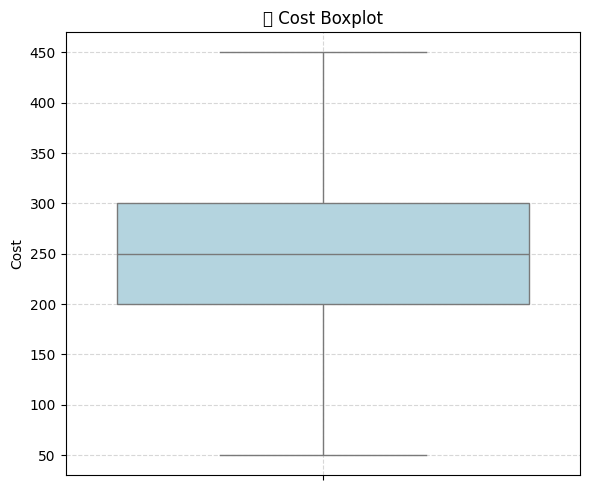

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
sns.boxplot(data=df, y='cost', color='lightblue')
plt.title('💰 Cost Boxplot')
plt.ylabel('Cost')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [ ]:
max_cost = df['cost'].max()
last_bin = max_cost if max_cost > 600 else 1000

df['cost_category'] = pd.cut(df['cost'],
                              bins=[0, 150, 300, 600, last_bin],
                              labels=['Cheap', 'Moderate', 'Expensive', 'Luxury'])

df['city_code'] = df['city'].astype('category').cat.codes

df[['cost', 'cost_category', 'cuisine_count']].head()


,cost,cost_category,cuisine_count
0,200.0,Moderate,2
1,200.0,Moderate,2
2,100.0,Cheap,1
3,250.0,Moderate,2
4,250.0,Moderate,2


In [ ]:
df.drop_duplicates(inplace=True)

text_cols = ['name', 'cuisine', 'city', 'address']
for col in text_cols:
    df[col] = df[col].astype(str).str.strip().str.lower()

df['main_cuisine'] = df['cuisine'].apply(lambda x: str(x).split(',')[0] if pd.notnull(x) else "unknown")
df['is_highly_rated'] = np.where(df['rating'] >= 4.0, 1, 0)
df['name_length'] = df['name'].apply(lambda x: len(str(x).split()))
df['rating_per_100_reviews'] = df['rating'] / (df['rating_count'] + 1) * 100
df['address_length'] = df['address'].apply(lambda x: len(str(x).split()))
df['cuisine_name_length'] = df['cuisine'].apply(lambda x: len(str(x)))
df['has_link'] = df['link'].apply(lambda x: 0 if pd.isnull(x) or str(x).strip() == '' else 1)
df['has_menu'] = df['menu'].apply(lambda x: 0 if pd.isnull(x) or str(x).strip() == '' else 1)
df['has_lic_no'] = df['lic_no'].apply(lambda x: 0 if pd.isnull(x) or str(x).strip() == '' else 1)


In [ ]:
df

,id,name,city,rating,rating_count,cost,cuisine,lic_no,link,address,...,city_code,main_cuisine,is_highly_rated,name_length,rating_per_100_reviews,address_length,cuisine_name_length,has_link,has_menu,has_lic_no
0,567335,ab foods point,abohar,4.0,50.0,200.0,"beverages,pizzas",22122652000138,https://www.swiggy.com/restaurants/ab-foods-po...,"ab foods point, near rishi narang dental clini...",...,1,beverages,1,3,7.843137,13,16,1,1,1
1,531342,janta sweet house,abohar,4.0,50.0,200.0,"sweets,bakery",12117201000112,https://www.swiggy.com/restaurants/janta-sweet...,"janta sweet house, bazar no.9, circullar road,...",...,1,sweets,1,3,7.843137,8,13,1,1,1
2,158203,theka coffee desi,abohar,4.0,50.0,100.0,beverages,22121652000190,https://www.swiggy.com/restaurants/theka-coffe...,"theka coffee desi, sahtiya sadan road city",...,1,beverages,1,3,7.843137,7,9,1,1,1
3,187912,singh hut,abohar,4.0,50.0,250.0,"fast food,indian",22119652000167,https://www.swiggy.com/restaurants/singh-hut-n...,"singh hut, circular road near nehru park abohar",...,1,fast food,1,2,7.843137,8,16,1,1,1
4,543530,grill masters,abohar,4.0,50.0,250.0,"italian-american,fast food",12122201000053,https://www.swiggy.com/restaurants/grill-maste...,"grill masters, ada heights, abohar - hanumanga...",...,1,italian-american,1,2,7.843137,13,26,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148536,553122,the food delight,yavatmal,4.0,50.0,200.0,"fast food,snacks",21522053000452,https://www.swiggy.com/restaurants/the-food-de...,"the food delight, 94mc+x35, new singhania naga...",...,816,fast food,1,3,7.843137,13,16,1,1,1
148537,562647,maitri foods & beverages,yavatmal,4.0,50.0,300.0,pizzas,license,https://www.swiggy.com/restaurants/maitri-food...,"maitri foods & beverages, polic mitrya society...",...,816,pizzas,1,4,7.843137,12,6,1,1,1
148538,559435,cafe bella ciao,yavatmal,4.0,50.0,300.0,"fast food,snacks",21522251000378,https://www.swiggy.com/restaurants/cafe-bella-...,"cafe bella ciao, shop no 2 nemani market sbi s...",...,816,fast food,1,3,7.843137,14,16,1,1,1
148539,418989,grill zilla,yavatmal,4.0,50.0,250.0,continental,21521251000241,https://www.swiggy.com/restaurants/grill-zilla...,"grill zilla, sho no 2/6, postel ground chowpat...",...,816,continental,1,2,7.843137,11,11,1,1,1


In [ ]:
print("Unique IDs:", df['id'].nunique())
print("Duplicate IDs:", df.duplicated('id').sum())
print("Unique restaurant names:", df['name'].nunique())


Unique IDs: 148541
Duplicate IDs: 0
Unique restaurant names: 105921


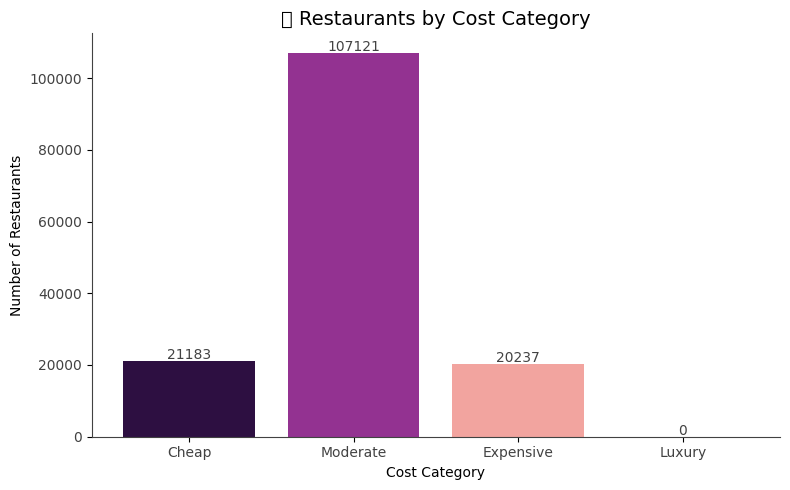

In [ ]:
cost_counts = df['cost_category'].value_counts().sort_index()

fig = plt.figure(figsize=[8, 5])
ax = fig.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#424242")
ax.spines["bottom"].set_color("#424242")

colors = ["#2d0f41", "#933291", "#f2a49f", "#f9cdac"]
bars = plt.bar(cost_counts.index.astype(str), cost_counts.values, color=colors)

plt.xticks(color="#424242")
plt.yticks(color="#424242")
plt.xlabel("Cost Category")
plt.ylabel("Number of Restaurants")
for i, v in enumerate(cost_counts.values):
    ax.text(i, v + 500, str(v), ha='center', color='#424242', fontsize=10)

plt.title("🍽️ Restaurants by Cost Category", fontsize=14)
plt.tight_layout()
plt.show()


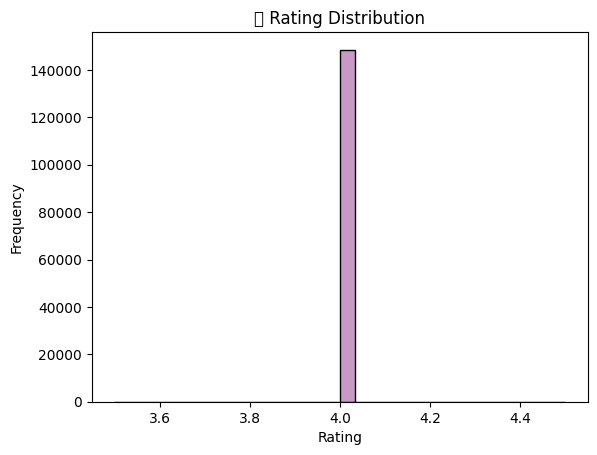

In [ ]:
sns.histplot(df['rating'], bins=30, kde=True, color="#933291")
plt.title("⭐ Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()


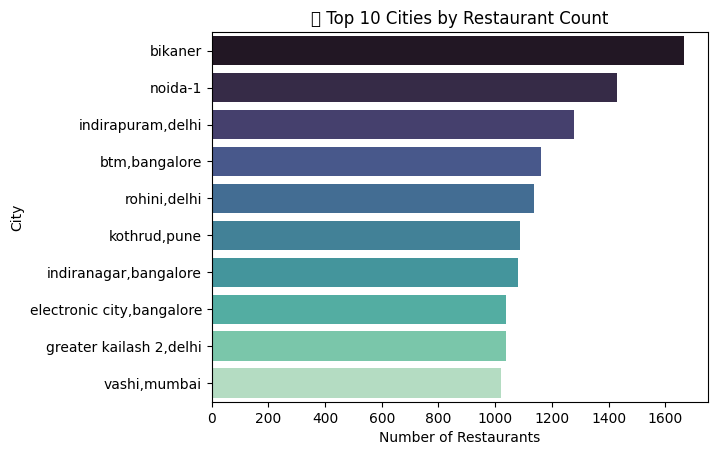

In [ ]:
top_cities = df['city'].value_counts().head(10)
sns.barplot(x=top_cities.values, y=top_cities.index, palette="mako")
plt.title("🏙️ Top 10 Cities by Restaurant Count")
plt.xlabel("Number of Restaurants")
plt.ylabel("City")
plt.show()


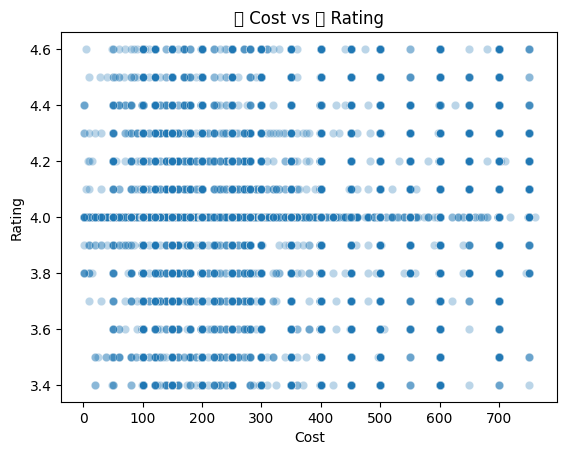

In [ ]:
sns.scatterplot(x='cost', y='rating', data=df, alpha=0.3)
plt.title("💵 Cost vs ⭐ Rating")
plt.xlabel("Cost")
plt.ylabel("Rating")
plt.show()


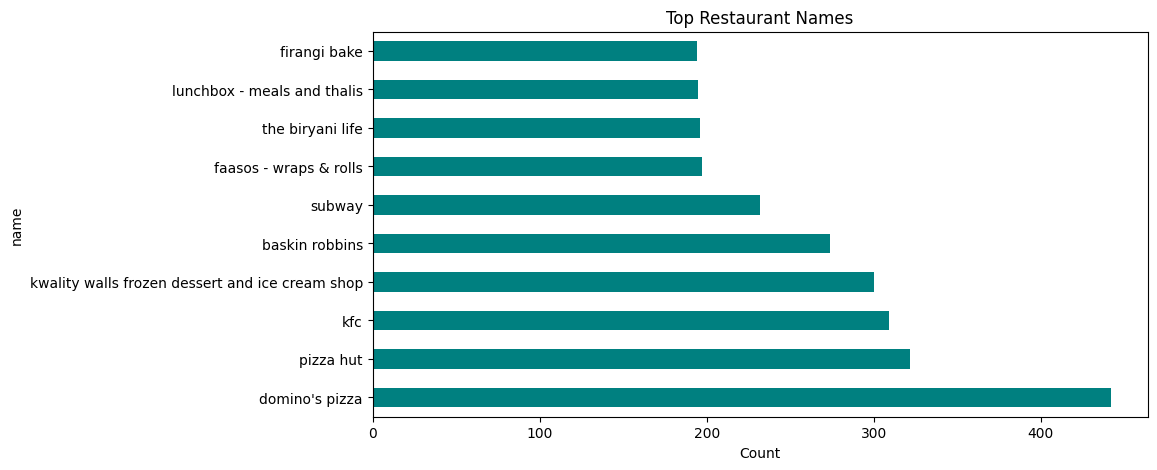

In [ ]:
df['name'].value_counts().head(10).plot(kind='barh', figsize=(10,5), color='teal')
plt.title("Top Restaurant Names")
plt.xlabel("Count")
plt.show()


In [ ]:
print(df.columns.tolist())


['id', 'name', 'city', 'rating', 'rating_count', 'cost', 'cuisine', 'lic_no', 'link', 'address', 'menu', 'cuisine_count', 'cost_category', 'city_code', 'main_cuisine', 'is_highly_rated', 'name_length', 'rating_per_100_reviews', 'address_length', 'cuisine_name_length', 'has_link', 'has_menu', 'has_lic_no']


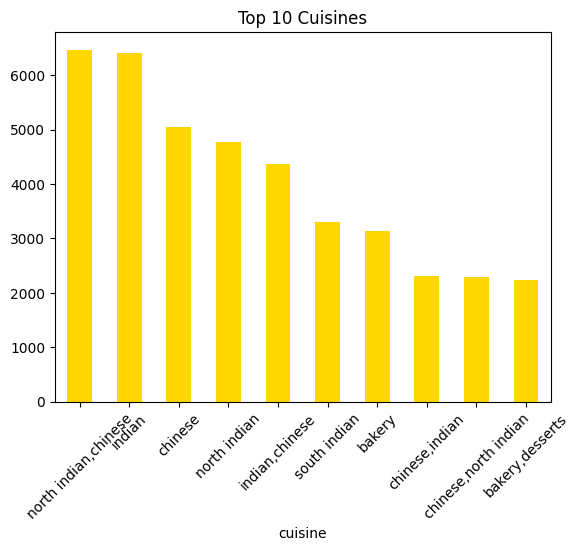

In [ ]:
df['cuisine'].value_counts().head(10).plot(kind='bar', color='gold')
plt.title("Top 10 Cuisines")
plt.xticks(rotation=45)
plt.show()


In [ ]:
print(df.columns.tolist())


['id', 'name', 'city', 'rating', 'rating_count', 'cost', 'cuisine', 'lic_no', 'link', 'address', 'menu', 'cuisine_count', 'cost_category', 'city_code', 'main_cuisine', 'is_highly_rated', 'name_length', 'rating_per_100_reviews', 'address_length', 'cuisine_name_length', 'has_link', 'has_menu', 'has_lic_no']


In [ ]:
df

,id,name,city,rating,rating_count,cost,cuisine,lic_no,link,address,...,city_code,main_cuisine,is_highly_rated,name_length,rating_per_100_reviews,address_length,cuisine_name_length,has_link,has_menu,has_lic_no
0,567335,ab foods point,abohar,4.0,50.0,200.0,"beverages,pizzas",22122652000138,https://www.swiggy.com/restaurants/ab-foods-po...,"ab foods point, near rishi narang dental clini...",...,1,beverages,1,3,7.843137,13,16,1,1,1
1,531342,janta sweet house,abohar,4.0,50.0,200.0,"sweets,bakery",12117201000112,https://www.swiggy.com/restaurants/janta-sweet...,"janta sweet house, bazar no.9, circullar road,...",...,1,sweets,1,3,7.843137,8,13,1,1,1
2,158203,theka coffee desi,abohar,4.0,50.0,100.0,beverages,22121652000190,https://www.swiggy.com/restaurants/theka-coffe...,"theka coffee desi, sahtiya sadan road city",...,1,beverages,1,3,7.843137,7,9,1,1,1
3,187912,singh hut,abohar,4.0,50.0,250.0,"fast food,indian",22119652000167,https://www.swiggy.com/restaurants/singh-hut-n...,"singh hut, circular road near nehru park abohar",...,1,fast food,1,2,7.843137,8,16,1,1,1
4,543530,grill masters,abohar,4.0,50.0,250.0,"italian-american,fast food",12122201000053,https://www.swiggy.com/restaurants/grill-maste...,"grill masters, ada heights, abohar - hanumanga...",...,1,italian-american,1,2,7.843137,13,26,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148536,553122,the food delight,yavatmal,4.0,50.0,200.0,"fast food,snacks",21522053000452,https://www.swiggy.com/restaurants/the-food-de...,"the food delight, 94mc+x35, new singhania naga...",...,816,fast food,1,3,7.843137,13,16,1,1,1
148537,562647,maitri foods & beverages,yavatmal,4.0,50.0,300.0,pizzas,license,https://www.swiggy.com/restaurants/maitri-food...,"maitri foods & beverages, polic mitrya society...",...,816,pizzas,1,4,7.843137,12,6,1,1,1
148538,559435,cafe bella ciao,yavatmal,4.0,50.0,300.0,"fast food,snacks",21522251000378,https://www.swiggy.com/restaurants/cafe-bella-...,"cafe bella ciao, shop no 2 nemani market sbi s...",...,816,fast food,1,3,7.843137,14,16,1,1,1
148539,418989,grill zilla,yavatmal,4.0,50.0,250.0,continental,21521251000241,https://www.swiggy.com/restaurants/grill-zilla...,"grill zilla, sho no 2/6, postel ground chowpat...",...,816,continental,1,2,7.843137,11,11,1,1,1


Unique restaurant names: 105921


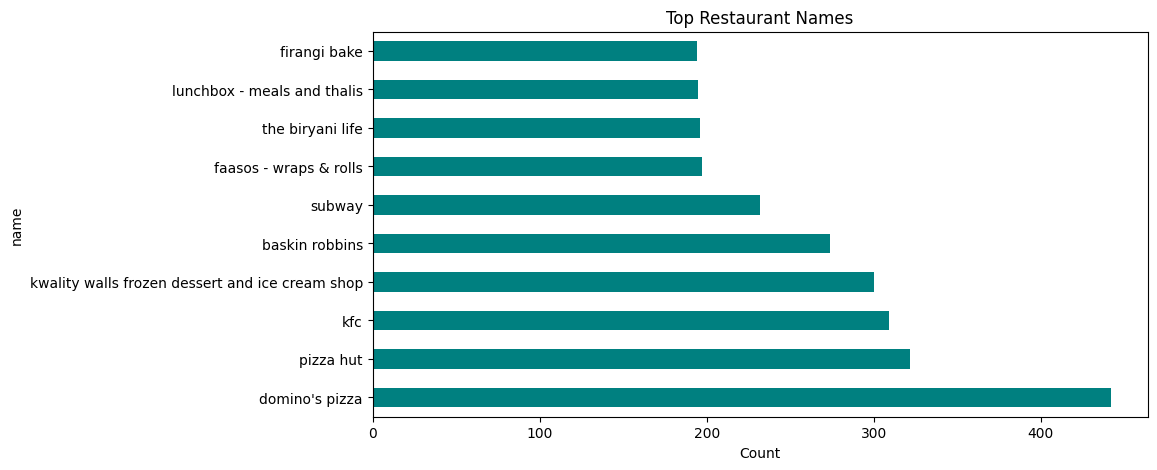

In [ ]:
print("Unique restaurant names:", df['name'].nunique())
df['name'].value_counts().head(10).plot(kind='barh', figsize=(10,5), color='teal')
plt.title("Top Restaurant Names")
plt.xlabel("Count")
plt.show()


In [ ]:
df

,id,name,city,rating,rating_count,cost,cuisine,lic_no,link,address,...,main_cuisine,is_highly_rated,name_length,rating_per_100_reviews,address_length,cuisine_name_length,has_link,has_menu,has_lic_no,restaurant_type
0,567335,ab foods point,abohar,4.0,50.0,200.0,"beverages,pizzas",22122652000138,https://www.swiggy.com/restaurants/ab-foods-po...,"ab foods point, near rishi narang dental clini...",...,beverages,1,3,7.843137,13,16,1,1,1,Single
1,531342,janta sweet house,abohar,4.0,50.0,200.0,"sweets,bakery",12117201000112,https://www.swiggy.com/restaurants/janta-sweet...,"janta sweet house, bazar no.9, circullar road,...",...,sweets,1,3,7.843137,8,13,1,1,1,Single
2,158203,theka coffee desi,abohar,4.0,50.0,100.0,beverages,22121652000190,https://www.swiggy.com/restaurants/theka-coffe...,"theka coffee desi, sahtiya sadan road city",...,beverages,1,3,7.843137,7,9,1,1,1,Single
3,187912,singh hut,abohar,4.0,50.0,250.0,"fast food,indian",22119652000167,https://www.swiggy.com/restaurants/singh-hut-n...,"singh hut, circular road near nehru park abohar",...,fast food,1,2,7.843137,8,16,1,1,1,Single
4,543530,grill masters,abohar,4.0,50.0,250.0,"italian-american,fast food",12122201000053,https://www.swiggy.com/restaurants/grill-maste...,"grill masters, ada heights, abohar - hanumanga...",...,italian-american,1,2,7.843137,13,26,1,1,1,Chain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148536,553122,the food delight,yavatmal,4.0,50.0,200.0,"fast food,snacks",21522053000452,https://www.swiggy.com/restaurants/the-food-de...,"the food delight, 94mc+x35, new singhania naga...",...,fast food,1,3,7.843137,13,16,1,1,1,Single
148537,562647,maitri foods & beverages,yavatmal,4.0,50.0,300.0,pizzas,license,https://www.swiggy.com/restaurants/maitri-food...,"maitri foods & beverages, polic mitrya society...",...,pizzas,1,4,7.843137,12,6,1,1,1,Single
148538,559435,cafe bella ciao,yavatmal,4.0,50.0,300.0,"fast food,snacks",21522251000378,https://www.swiggy.com/restaurants/cafe-bella-...,"cafe bella ciao, shop no 2 nemani market sbi s...",...,fast food,1,3,7.843137,14,16,1,1,1,Single
148539,418989,grill zilla,yavatmal,4.0,50.0,250.0,continental,21521251000241,https://www.swiggy.com/restaurants/grill-zilla...,"grill zilla, sho no 2/6, postel ground chowpat...",...,continental,1,2,7.843137,11,11,1,1,1,Single


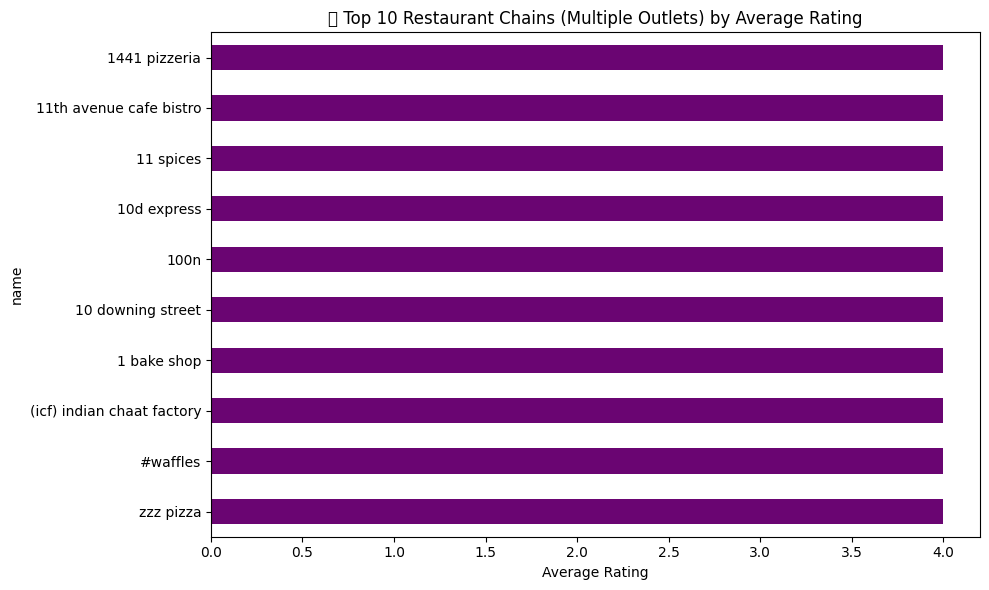

In [ ]:
outlet_counts = df['name'].value_counts()
minimum_outlets = outlet_counts[outlet_counts > 1]

top10_chains2 = (
    df[df["name"].isin(minimum_outlets.index)]
    .groupby("name")["rating"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
    .sort_values(ascending=True)
)

plt.figure(figsize=(10, 6))
top10_chains2.plot(kind='barh', color='#6a0572')
plt.xlabel("Average Rating")
plt.title("🏆 Top 10 Restaurant Chains (Multiple Outlets) by Average Rating")
plt.tight_layout()
plt.show()


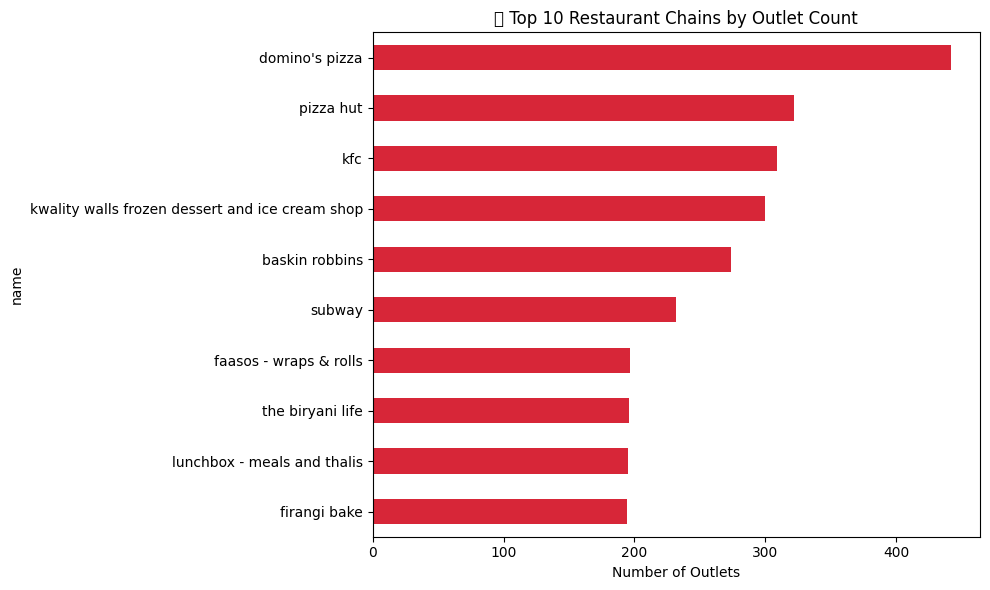

In [ ]:
top10_foodchains = df['name'].value_counts().head(10).sort_values(ascending=True)

plt.figure(figsize=(10, 6))
top10_foodchains.plot(kind='barh', color='#d72638')
plt.xlabel("Number of Outlets")
plt.title("🏢 Top 10 Restaurant Chains by Outlet Count")
plt.tight_layout()
plt.show()


In [ ]:
outlet_counts = df['name'].value_counts()

# Add a column to classify each restaurant as "Chain" or "Single"
df['restaurant_type'] = df['name'].apply(lambda x: 'Chain' if outlet_counts[x] > 1 else 'Single')


In [ ]:
df.head()

,id,name,city,rating,rating_count,cost,cuisine,lic_no,link,address,...,main_cuisine,is_highly_rated,name_length,rating_per_100_reviews,address_length,cuisine_name_length,has_link,has_menu,has_lic_no,restaurant_type
0,567335,ab foods point,abohar,4.0,50.0,200.0,"beverages,pizzas",22122652000138,https://www.swiggy.com/restaurants/ab-foods-po...,"ab foods point, near rishi narang dental clini...",...,beverages,1,3,7.843137,13,16,1,1,1,Single
1,531342,janta sweet house,abohar,4.0,50.0,200.0,"sweets,bakery",12117201000112,https://www.swiggy.com/restaurants/janta-sweet...,"janta sweet house, bazar no.9, circullar road,...",...,sweets,1,3,7.843137,8,13,1,1,1,Single
2,158203,theka coffee desi,abohar,4.0,50.0,100.0,beverages,22121652000190,https://www.swiggy.com/restaurants/theka-coffe...,"theka coffee desi, sahtiya sadan road city",...,beverages,1,3,7.843137,7,9,1,1,1,Single
3,187912,singh hut,abohar,4.0,50.0,250.0,"fast food,indian",22119652000167,https://www.swiggy.com/restaurants/singh-hut-n...,"singh hut, circular road near nehru park abohar",...,fast food,1,2,7.843137,8,16,1,1,1,Single
4,543530,grill masters,abohar,4.0,50.0,250.0,"italian-american,fast food",12122201000053,https://www.swiggy.com/restaurants/grill-maste...,"grill masters, ada heights, abohar - hanumanga...",...,italian-american,1,2,7.843137,13,26,1,1,1,Chain


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import random
import urllib.request

# Download font (if not already present)
font_url = "https://github.com/google/fonts/raw/main/ofl/lobstertwo/LobsterTwo-Regular.ttf"
font_path = "LobsterTwo-Regular.ttf"
urllib.request.urlretrieve(font_url, font_path)

# Custom color generator
def random_color_func(word=None, font_size=None, position=None, orientation=None, font_path=None, random_state=None):
    return f"rgb({random.randint(0,255)}, {random.randint(0,255)}, {random.randint(0,255)})"




In [ ]:
cuisine_text = " ".join(df['cuisine'].dropna().astype(str).replace(',', ' ', regex=True))
wordcloud_cuisine = WordCloud(
    width=1000,
    height=500,
    background_color='black',
    font_path=font_path,
    color_func=random_color_func,
    collocations=False,
    max_words=300,
    contour_color='white',
    contour_width=2
).generate(cuisine_text)

plt.figure(figsize=(12, 7))
plt.imshow(wordcloud_cuisine, interpolation='bilinear')
plt.axis('off')
plt.title(" Colorful WordCloud of Cuisines", fontsize=05, color='white')
plt.tight_layout()
plt.show()


SyntaxError: leading zeros in decimal integer literals are not permitted; use an 0o prefix for octal integers (<ipython-input-1-4102434276>, line 17)

In [ ]:
print(df['rating'].dropna().shape)
print(df['rating'].dropna().unique())


(148541,)
[4.]


In [ ]:
print(df['rating'].nunique())


1


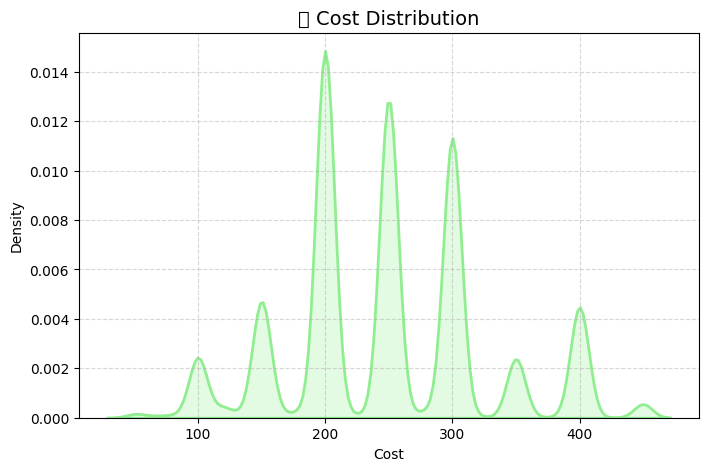

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.kdeplot(df['cost'].dropna(), fill=True, color='lightgreen', linewidth=2)
plt.title("💰 Cost Distribution", fontsize=14)
plt.xlabel("Cost")
plt.ylabel("Density")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


In [ ]:
print("Thank You")

Thank You
